<h1><center>What can we learn from LinkedIn data?</center></h1>
<h3><center>Analyzing employment trends and user behavior on the popular professional networking platform, amidst record unemployment rates due to the COVID-19 pandemic</center></h3>
<center>Christy Qiu | December 22, 2020<center>

<img src="img/title_img.jpg" style="width: 800px;">

I set up my first ever LinkedIn account in February 2020, before I knew how terribly the COVID-19 pandemic would impact the job market. A college sophomore at the time, I had scored my first official summer internship, but hearing how so many of my peers' internships got rescinded due to COVID-19, I began to look into other opportunities, in case mine would also be rescinded. On LinkedIn, I saw classmates posting their resumes and sharing how they had lost their internship, hoping that they could receive support from their LinkedIn connections. I also saw mentors of mine, working at Disney, Airbnb, and Uber, post about how they were furloughed and were seeking new opportunities.

A few weeks after I created my account, I received the unfortunate news — my internship had also been rescinded. LinkedIn became a site that I visited hundreds of times a day. I anxiously scrambled to find myself suitable opportunities before the summer began but was comforted by the fact that I was in the same boat as hundreds of thousands other people.

<img src="img/jobs.png" style="width: 700px;">

The COVID-19 pandemic has resulted in the COVID-19 recession — the worst global economic crisis since the Great Depression. As I was applying to dozens of jobs each week, the unemployment rate was rising with each day. As seen in the graphs above, unemployment rates rose more within the first two months of Covid than in the first two years of the Great Recession, and the number of job openings quickly dropped below 4 million and continued to sink for months. In the single week of March 21, 3.3 million unemployment claims were made, setting a record high. Unemployment rates peaked in April at 14.7% — an unprecedented level not seen since data collection started in 1948. In fact, in April, every state and the District of Columbia reached unemployment rates greater than their highest unemployment rates during the Great Recession. 

Fortunately, the unemployment rate has declined since then. In November, unemployment rate edged down to 6.7%. However, this is still 3% higher than the rate in February. The job market remains competitive, with high demand from job seekers, but low supply from employers. Using data scraped directly from LinkedIn, I seek to examine the underlying characteristics of the labor market, such as racial and gender biases. I also hope to tackle the question: How can one leverage LinkedIn to stand out from the competition? Illuminating many implicit, yet prominent employment practices, I aim to provide job seekers beneficial insight to the cryptic world of job recruiting.

## Important functions

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture
%run ../data_analysis/data_analysis_assignment_6.ipynb
%run ../data_analysis/data_analysis_assignment_7.ipynb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

I used two datasets provided by Kaggle.
- The first dataset `linkedin_original` (https://www.kaggle.com/killbot/linkedin). This dataset includes important data about LinkedIn users' attributes, such as their age, ethnicity, and number of LinkedIn followers. All the data collected is from Australian Linkedin users on January 1, 2018.
- The second dataset `linkedin_updated` (https://www.kaggle.com/killbot/linkedin-profiles-and-jobs-data). Similar to the first dataset, this one provides some data on the attributes of LinkedIn users, such as their position title, LinkedIn Premium membership, and whether or not they have a profile picture, but this dataset additionally provides data on the attributes of the companies users work at, such as the company's total staff count and LinkedIn follower count. All the data collected is from Australian Linkedin users and was last updated on January 2, 2018.

In [4]:
linkedin_original.head(3)

,avg_position_len,company_name,n_positions,age,beauty,blur,ethnicity,gender,smile,n_followers,f_500_check
0,457.0,TD,1,37,57.57,0.421,Asian,0,77.536,420,False
1,212.0,Light Up The World (LUTW),1,37,57.57,0.421,Asian,0,77.536,420,False
2,243.0,Glacier,1,37,57.57,0.421,Asian,0,77.536,420,False


In [5]:
linkedin_updated.head(3)

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,followersCount,genderEstimate,hasPicture,isPremium,posTitle,avgMemberPosDuration
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Portfolio Executive,760.5
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,506.0,0.0,0,0.0,Solution Delivery Executive,760.5
2,41.0,10047.0,CommSec,619.0,500.0,506.0,0.0,0,0.0,Project Manager,760.5


In [6]:
print("The data encompasses a total of", len(linkedin_original)+len(linkedin_updated), "LinkedIn users.")

The data encompasses a total of 101124 LinkedIn users.


## Table of Contents
**Part 1: Gender Equality Check**
- Gender Leadership Gap: What proportion of company executives are female? Male?
- Gender Bias: Are women actually more likely to have shorter tenures?

**Part 2: Racial Bias Check**
- Do the proportion of Asians, Whites, and Blacks working at Fortune 500 companies reflect their overall population proportions?
- Which Fortune 500 companies have the highest racial diversity?

**Part 3: Ageism in the Workplace**
- Do millenials tend to switch positions more frequently than other age groups?
- What are the differences in the types of positions held by people newer to the job market, in comparison to those held by people who are more experienced?

**Part 4: Benefits of LinkedIn Features**
- Among LinkedIn users who work at large companies, is the proportion of users who include a profile picture larger than the proportion without profile pictures?
- Are there more LinkedIn Premium members than regular users working at well-known companies?
- The Credibility of LinkedIn Influencers: Do followers correlate with work history?

**Key Takeaways**

**Concluding Thoughts**

## <center>Part 1: Gender Equality Check<center>

### <i>Gender Leadership Gap: What proportion of company executives are female? Male?<i>

<img src="img/gender_equity.jpg" style="width: 500px;">

As a young women entering the job market, the issue of gender equality in the workforce is critical to me. Despite many advances in gender equality within the workplace, women across the globe continue to be underrepresented at every level. In particular, they hit a "glass ceiling," blocking them from advancing to senior leadership positions. According to research by Catalyst (https://www.catalyst.org/research/women-in-sp-500-companies/), only about 25% of senior positions at U.S. public companies are held by women, although women make up about half of the workforce. Additionally, <i>Forbes</i> (https://www.forbes.com/sites/shephyken/2019/12/15/the-executive-gender-gap/?sh=209448523b2f) reported that "only about 5% of the leaders of the S&P 500 companies are women."

Is the gender gap truly this wide within my data? Accounting for the fact that there are less women than men within the dataset, is the ratio of female leaders to all females the same as the ratio of male leaders to all males? Essentially, what I'm asking is: Given the systematic smaller proportion of female workers, is there still a much smaller proportion of female leaders? 

To tackle these questions, I used the second of the two datasets, since it provided information on both gender and position titles. I first created a list of strings that relate that signify executive position titles. Strings, for example, included "Executive," "CEO," and "President." I then used the list to filter for rows where the column with position titles contained these strings. After subsetting the data, I calculated the proportion of executives based on gender and compared this to the theoretical proportions, in which a gender leadership gap does not exist. To calculate these theoretical proportions, I simply found the ratio of male executives to all males and the ratio of female executives to all females. The following dataframe and barplot show my findings.

In [7]:
execs

,Gender,Theoretical Proportion,Actual Proportion
0,Male,0.670258,0.711041
1,Female,0.329742,0.288959


Text(0, 0.5, 'Ratio')

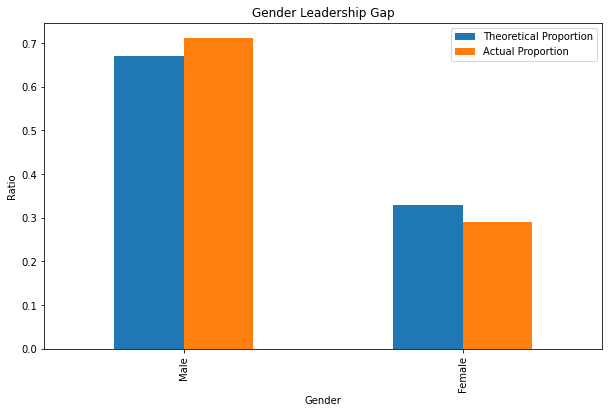

In [8]:
execs.plot(kind='bar', x='Gender', figsize=(10,6))
plt.title('Gender Leadership Gap')
plt.ylabel('Ratio')

As explained earlier, if there was not a gender leadership gap, the proportion of male leaders would be equal to the proportion of males within the workforce, and the same would be true for the proportion of female leaders. Based on the dataset, **at most, 67% of the executives in the dataset would be male**, while the rest would be female.

However, as seen in the bar plot above, males actually make up more than this percentage; **they comprise of over 71% of executives** — 4% higher than the percentage required to eliminate a gender leadership gap. Thus, there exists a small, but apparent gender leadership gap within the data.

### <i>Gender Bias: Are women actually more likely to have shorter tenures?<i>

<img src="img/maternity_leave.jpeg" style="width: 500px;">

Another form of gender inequality in the workplace takes place in the hiring process. Many employers exercise bias against women by being less likely to hire them because they are known to have shorter tenures. With that being said, here's an article in <i>The Guardian </i>(https://www.theguardian.com/money/2014/aug/12/managers-avoid-hiring-younger-women-maternity-leave) that confirms that "40% of managers avoid hiring younger women to get around maternity leave". Another article (https://phys.org/news/2019-03-women-percent-hiring-men.html#:~:text=The%20authors%20conclude%20that%20gender,or%20experience%20in%20supervisory%20tasks) reported that "women are on average 30 percent less likely to be called for a job interview than men with the same characteristics." Additionally, women with children, on average, were "35.9 percent less likely" to be offered an interview than men with children.

I thought it would be interesting to investigate the underlying assumption behind this hiring bias: are women actually more likely to have shorter tenures at companies? 

In my analysis, I first subset the data based on gender, creating two dataframes, one for women and another for men. Then, I subset one step further, creating two more dataframes — one for women under 50 and another for men under 50. This allows me to focus on a younger popoulation since women and men in this age group are more likely to become new mothers and fathers. Then, I compare the average position duration of the two genders and calculate their differences. I do the same for the dataframe with women and men under 50, expecting that the difference here would be larger since women in this age group are more likely to go on maternity leave. The data visualization below is created to clearly showcase the trend between age and position duration for the two genders.

In [9]:
#difference between men and women's position durations
men_duration-women_duration

101.70838026704234

In [10]:
#percent change of the two durations
(men_duration-women_duration)/women_duration

0.12383554520370205

In [11]:
#difference between position durations of men under 50 and women under 50
men_under50_duration-women_under50_duration

61.572504033534074

In [12]:
#percent change of the two durations
(men_under50_duration-women_under50_duration)/women_under50_duration

0.078994591800101

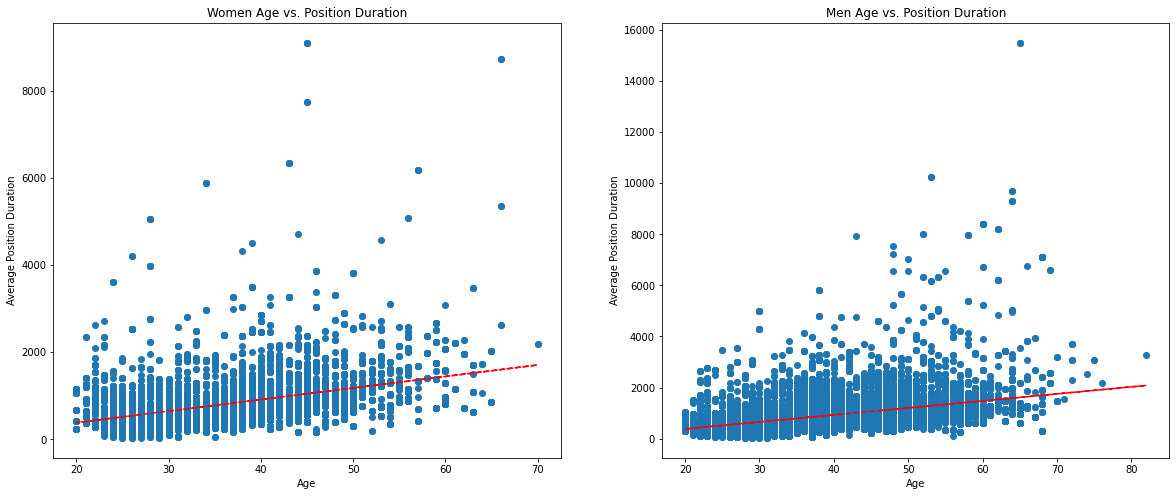

In [13]:
x1 = women['ageEstimate']
x2 = men['ageEstimate']

y1 = women['avgMemberPosDuration']
y2 = men['avgMemberPosDuration']

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
z1 = np.polyfit(x1, y1, 1)
p = np.poly1d(z1)
plt.plot(x1,p(x1),"r--")
plt.title('Women Age vs. Position Duration')
plt.xlabel('Age')
plt.ylabel('Average Position Duration')


plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
z2 = np.polyfit(x2, y2, 1)
p = np.poly1d(z2)
plt.plot(x2,p(x2),"r--")
plt.title('Men Age vs. Position Duration')
plt.xlabel('Age')
plt.ylabel('Average Position Duration')

plt.show()

Based on my data, there is some truth to the statement that women hold shorter tenures than men. On average, across all ages, men hold a position for about **102 days longer** than women do. The duration of men's positions are about **12.4% longer** than that of women's. 

An issue arises when I examine the position duration of men and women under 50. One of the main reason employers avoid hiring women is to circumvent maternity leave. Thus, we should expect that the difference between men and women's position duration is larger among people under 50, since this age group is more likely to become new mothers and fathers. However, this is not what we see in the data. Young men hold positions for about **62 days longer** than young women, and the duration of young men's positions is about **7.9% longer** than that of young women's. The difference is <i>smaller</i>, and it supports the idea that hiring managers' distaste for hiring young women has less to do with maternity leave than it does with gender bias. 

This idea is further supported by the graphs above. As seen with the trend lines in the two scatter plots, the relationship between age and position duration is similar for both men and women. Position duration increases with age, without discriminating based on gender.

## <center>Part 2: Racial Bias Check<center>

### <i>Do the proportion of Asians, Whites, and Blacks working at Fortune 500 companies reflect their overall population proportions?<i>

<img src="img/white_men.jpg" style="width: 500px;">

Research studies find that companies with greater racial and ethnic diversity achieve higher financial returns than companies with less diversity. <i>What to Become</i> (https://whattobecome.com/blog/diversity-in-the-workplace-statistics/) found that "diverse management boosts revenue by 19%" and that "racially diverse teams provide 35% better performance compared to their competitors."

Aware of the advantages of racially diverse teams as well as growing social pressures to become more racially diverse, many Fortune 500 companies claim to provide an inclusive work environment for their employees. They often boast about their diversity, equity, and inclusion initiatives. But, are Fortune 500 companies as diverse as they claim to be?

As I began my data analysis, I identified that there were only three unique races within the `linkedin_original` dataset: Asian, White, and Black. Keeping this in mind, I collected data on the Fortune 500 and used it to create a column within the original dataset that classified whether or not the company that a LinkedIn user works at is on the Fortune 500 list. I then found the proportion of different races working within Fortune 500 companies and compared them with the overall proportions. The dataframe and bar plot below are created using these proportions.

In [14]:
f500_race

,Race,All LinkedIn Users,Fortune 500
0,Asian,0.155332,0.172531
1,White,0.766630,0.743079
2,Black,0.078038,0.084390


Text(0, 0.5, 'Ratio')

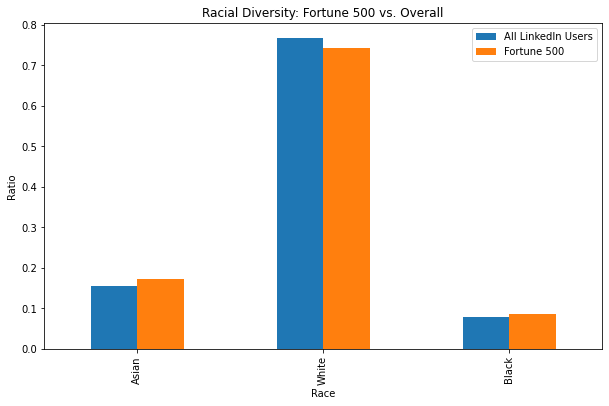

In [15]:
f500_race.plot(kind='bar', x='Race', figsize=(10,6))
plt.title('Racial Diversity: Fortune 500 vs. Overall')
plt.ylabel('Ratio')

The diversity within Fortune 500 companies reflects the diversity of the LinkedIn users within the dataset. In fact, as seen in the bar plot above, **there's a <i>higher</i> proportion of Asians and Blacks working in Fortune 500 companies than in the overall dataset.**

This is a great sign that Fortune 500 companies are heading in the right direction towards the diverse and inclusive vision that they have. Morever, as an Asian American, this finding is encouraging. However, further analysis should be done to see whether the racial minorities working at these companies are receiving the same career growth opportunities than Whites. Does a glass ceiling exist for Asians and Blacks who want to pursue certain promotions?

### <i>Which Fortune 500 companies have the highest racial diversity?<i>

<img src="img/racial_diversity.jpg" style="width: 500px;">

Further diving into my analysis of racial diversity in the workplace, I want to identify which companies out of the Fortune 500 list have minority statistics that reflect their racial diversity statements. Especially in this racially heated landscape, with the heightened civil unrest that occurred during the summer of 2020, job applicants are increasingly taking into account the racial diversity of the companies that they are considering applying to.

Which companies would be most welcoming to minority groups? Are the diversity statements from the Fortune 500 just PR, or do they hold truth?

Beginning my analysis, I first subsetted the data so that each company has more than 1 LinkedIn user working there. This is critical to the analysis because for companies in the dataset that only have 1 LinkedIn user working there, the data analysis may show that the company has 100% diversity, in the case that the 1 LinkedIn user working there is Asian or Black. This is inaccurate, so to more realistically examine the racial diversity of the companies, we must examine only the companies with more than 1 LinkedIn user. I then created a new column `minority` that checks whether the user is part of a minority group and grouped companies, based on the mean of the minority column, which allowed me to accurately compare the racial diversity of the employee base, using proportions. After identifying the top 20 most diverse Fortune 500 companies, I  reported some significant statistics found from the data and created the graph below to more clearly shows the minority proportions of these companies.

In [16]:
#number of F500 companies without a single minority employee
minority_rank[minority_rank['minority']==0.0].count()

minority    24
dtype: int64

In [17]:
#percentage of F500 companies without a single minority employee
int(minority_rank[minority_rank['minority']==0.0].count())/len(minority_rank)

0.24242424242424243

In [18]:
f500_top_20

,minority
company_name,
Tenneco,1.000000
Weyerhaeuser,0.666667
Applied Materials,0.666667
DXC Technology,0.625000
Walmart,0.571429
McKesson,0.500000
Western Digital,0.500000
Analog Devices,0.500000
S&P Global,0.500000


Text(0, 0.5, 'Ratio')

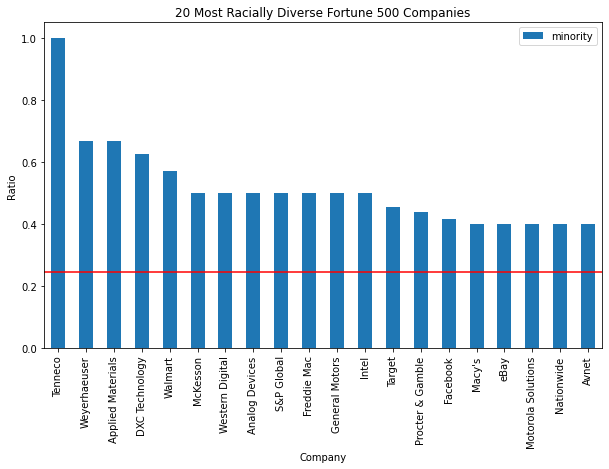

In [19]:
f500_top_20.plot(kind='bar', figsize=(10,6))
#plot a horizontal baseline for the mean of diversity proportions across the dataset (without the Fortune 500 filter)
plt.axhline(y=linkedin_multiple['minority'].mean(), color='r', linestyle='-')
plt.title("20 Most Racially Diverse Fortune 500 Companies")
plt.xlabel('Company')
plt.ylabel('Ratio')

Nearly half (49.5%) of the LinkedIn users who work at Fortune 500 companies is part of a minority group, and based on my data, 24, or **24%, of the Fortune 500 companies reported within the data have a minority base of 0%**. This is quite a large percentage and shows that there is still a lot of work to be done in many Fortune 500 companies.

Out of the 20 companies in the graph above, only Nationwide is ranked in Fortune's 100 Best Workplaces for Diversity 2018 (https://fortune.com/best-workplaces-for-diversity/2018/search/), with a minority makeup of 23%. This is much less than the 40% that's found within the data, which suggests that the data may not be that representative. Additional data analysis should be conducted for accuracy.

## <center>Part 3: Ageism in the Workplace<center>

### <i>Do millenials tend to switch positions more frequently than other age groups?<i>

<img src="img/job_hopper.png" style="width: 500px;">

Millenials are often said to face commitment issues when it comes to their professional lives. This has led them to be stereotyped as lazy, not loyal, and in need of constant praise. But, do millenials actually job-hop (working briefly in job positions instead of staying for the long-term) more than the generations that preceded them? 

While investigating this matter, I came across two contrasting takes: a report by Gallup (https://www.gallup.com/workplace/231587/millennials-job-hopping-generation.aspx) and an article by Thrive Global (https://thriveglobal.com/stories/debunking-the-job-hopping-myth-millenials-are-not-that-bad/). The Gallup report indicated that millennials do, in fact, live up to their reputation of being job-hoppers. In fact, they found that "21% of millennials say they've changed jobs within the past year, which is more than three times the number of non-millennials who report the same." The Thrive Global report challenged the view of millenials as a job-hopping generation; terming it as a myth and 'busting' it. 

To examine whether we can further 'bust' this myth, I first created a function to classify whether or not a LinkedIn user is a millenial, using 37-years-old (anyone born after 1980) as the oldest age a millenial can be. I then removed interns from the dataset because their terms are meant to be temporary, and thus, it will skew position duration to be shorter. Finding the mean of average position duration for millenials, it compared it to the average for non-millenials. The box plot below shows the key statistics of the two generational groups.

In [20]:
non_millenial['avgMemberPosDuration'].mean()/millenial['avgMemberPosDuration'].mean()

1.6124383902440962

Text(0.5, 0, 'Millenial: True of False')

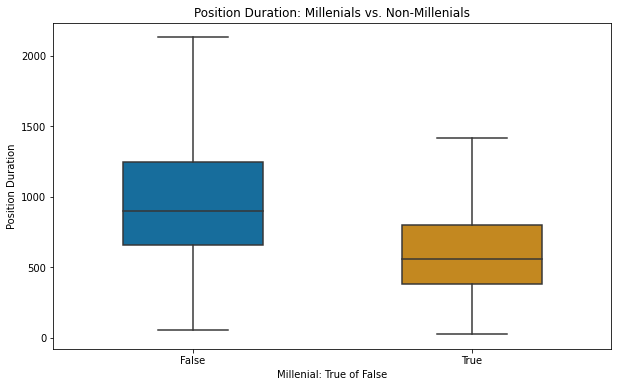

In [21]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='avgMemberPosDuration', x='millenial', data=linkedin_jobhop_check, width=0.5, palette="colorblind", showfliers=False)
ax.set_title('Position Duration: Millenials vs. Non-Millenials')
ax.set_ylabel('Position Duration')
ax.set_xlabel('Millenial: True of False')

Within this particular dataset, millenials do, indeed, tend to remain in their position for less time than non-millenials. In fact, the difference in the position durations of the two generations is quite large; **non-millenials, on average, work 1.6x longer than millenials** and as seen in the box plot, the data leans closer to the lower end of the position duration spectrum. This indicates that the term that Gallup uses ("job-hopping generation") to describe millenials holds some truth.

However, employment data from past decades must be analyzed to determine whether this job-hopping characteristic is unique to millenials. As seen from the prior analysis on gender hiring bias and maternity leave, position duration tends to increase along with age. Rather than millenials being lazy, this may be due the fact that young people are still in search of their career goals, whereas older people have already established them already, so young people tend to try more different positions.

### <i>What are the differences in the types of positions held by people newer to the job market, in comparison to those held by people who are more experienced?<i>

<img src="img/ageism.jpg" style="width: 500px;">

Employers often have negative attitudes towards older — or more experienced — workers. A survey (https://www.aarp.org/work/working-at-50-plus/info-2018/age-discrimination-common-at-work.html) found that "76 percent" of older workers "see age discrimination as a hurdle to finding a new job." Often times, there are jobs that are designated for older, more experienced people and other jobs that are designated for younger, less experienced people.

Rather than directly exploring this bias against older people, I wonder, what sort of positions do young people, who are new to the job market, hold? How do they differ from those held by experienced people? As someone entering the job market soon, what are some positions that would welcome newly graduated students, and as I advance in my career, what are the positions that would be open to me? 

In my analysis, I consider people 30 and younger to be new to the job market, whereas those who are older than 30 are considered experienced. I first subset the `linkedin_updated` dataset based on age. Then, using the wordcloud and collections dictionaries, I create two wordclouds, one containing the position titles held by people new to the job market and another containing those held by people more experienced.

**People New to the Job Market**

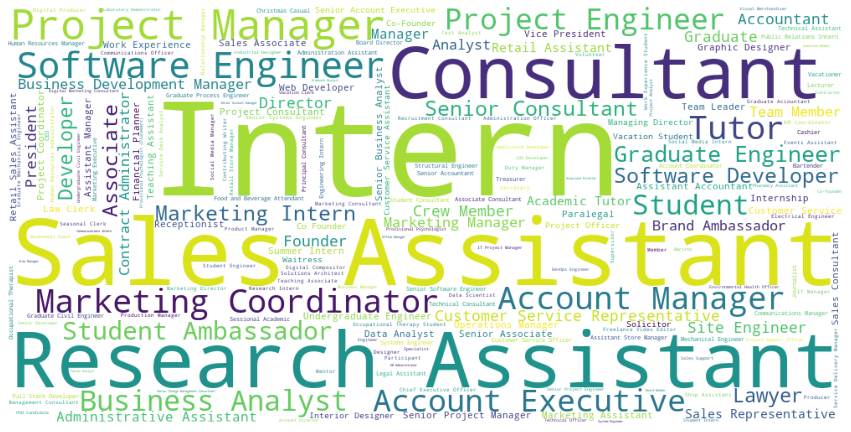

In [22]:
word_could_dict=Counter(new['posTitle'])
wordcloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
#top 10 most frequent job titles
counter_obj = Counter(new['posTitle'])
counter_obj.most_common()[:10]

[('Intern', 75),
 ('Sales Assistant', 68),
 ('Research Assistant', 59),
 ('Consultant', 51),
 ('Project Manager', 50),
 ('Software Engineer', 42),
 ('Tutor', 33),
 ('Marketing Coordinator', 33),
 ('Account Manager', 32),
 ('Account Executive', 31)]

**People More Experienced in the Job Market**

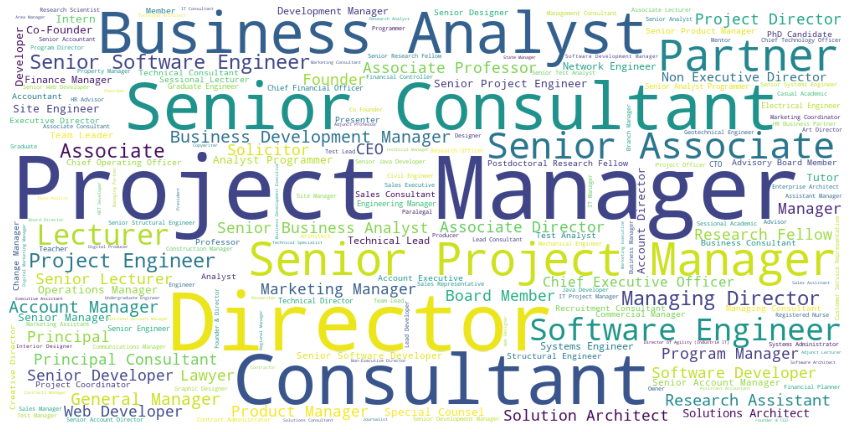

In [24]:
word_could_dict=Counter(experienced['posTitle'])
wordcloud = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA", width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
#top 10 most frequent job titles
counter_obj = Counter(experienced['posTitle'])
counter_obj.most_common()[:10]

[('Project Manager', 390),
 ('Director', 334),
 ('Consultant', 243),
 ('Senior Consultant', 205),
 ('Business Analyst', 164),
 ('Senior Project Manager', 162),
 ('Partner', 153),
 ('Senior Associate', 152),
 ('Software Engineer', 142),
 ('Lecturer', 122)]

As seen in the first word cloud, "intern" is the most common job title amongst people who are newer to the job market. This is followed by "sales assistant" and "research assistant." As expected, these positions tend to be introductory-level, with little managerial responsibilities.

Amongst experienced people, "project manager" is the most common job title, followed by "director" and "consultant." There are some overlap in the two lists — "project manager," "consultant," and "software engineer" are common for both inexperienced and experienced people. Despite some of the overlap, the majority of the positions in the wordcloud have managerial duties. **The difference between the two word clouds signify that these LinkedIn users experienced growth within their career trajectory throughout the years.**

## <center>Part 4: Benefits of LinkedIn Features<center>

### <i>Among LinkedIn users who work at large companies, is the proportion of users who include a profile picture larger than the proportion without profile pictures?<i>

<img src="img/linkedin_profile.jpg" style="width: 500px;">

Transitioning to the "Benefits of LinkedIn Features," I want to include this section to examine how job seekers can best take advantage of what LinkedIn has to offer. As the largest and most prominent professional networking platform, there can be many instances when your profile is just lost in a sea of thousands of other, similar profiles. How can one optimize their profile so that they can increase their chances of scoring their dream job?

A piece of advice that I've heard repeatedly is: If you want to work at a well-known or large company, the first thing you need to do in order to improve your chances is to add a profile picture to your LinkedIn. LinkedIn Founder, former CEO, and current Executive Chairman Jeff Weiner (link: https://www.youtube.com/watch?v=RuAo2_LXNWA) mentioned this when attending speaker panels at Penn.

Based on my data, do people who include profile pictures actually have a better shot at working at a big company? I answer this question by filtering out small companies. To do this, I subset the data by only keeping the rows in which the company a user works at has a staff count that is larger than the mean count. Then, I calculate the proportion of users working at these large companies who have profile pictures and compare them with that of users working at small companies. The data frame and bar plot below showcase these proportions.

In [26]:
pfp

,Has Profile Picture,Small Company,Large Company
0,Yes,0.750062,0.741531
1,No,0.249938,0.258469


Text(0, 0.5, 'Ratio')

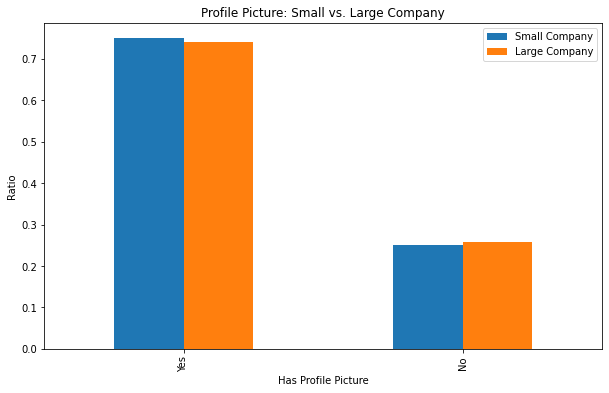

In [27]:
pfp.plot(kind='bar', x='Has Profile Picture', figsize=(10,6))
plt.title('Profile Picture: Small vs. Large Company')
plt.ylabel('Ratio')

LinkedIn users who include a profile picture comprise of **74% of users working at large companies**. Even among the population of users working at smaller companies, a large percentage (75%) of them include a profile picture. Thus, including a profile picture would not be harmful to one's profile, and instead, can be benefitial. This providing provides some truth to the statement that a LinkedIn profile picture can make a great first impression.

To further understand the benefits of including a profile picture, additional analysis should be done on whether or not LinkedIn users with profile pictures receive more engagement, in terms of profile views and connection requests. Also, what sort of profile picture receive more engagement? One in which the user is dressed casually or in business formal attire?

### <i>Are there more LinkedIn Premium members than regular users working at well-known companies?<i>

<img src="img/linkedin_premium.png" style="width: 700px;">

I frequently get promotional messages on LinkedIn, encouraging me to sign up for LinkedIn's premium membership. I also noticed that a significant number of my connections on LinkedIn have the premium membership. What's the hype about the membership?

LinkedIn's premium membership allows users to easily connect with hiring managers, see who has viewed their profile, and access 15,000 expert-led LinkedIn Learning courses. It's priced up to $59.99 per month for job seekers, and it's said to be an investment for one's career. The benefits of the premium membership do sound compelling, does it actually result in users working at the prestigious companies they're aiming for?

Similar to the previous part, I began by filtering rows based on a company feature. Rather than using the company's staff count, I filtered based on the number of LinkedIn followers the company has. If a company's follower count was higher than the mean, that company would be considered a well-known company, and vice versa. I then calculated the overall proportions of Premium users at well-known companies vs. lesser-known companies, as well the proportion across all users. The dataframe and bar plot below are created from these proportions.

In [28]:
membership

,User Type,Lesser Known Company,Well Known Company,Overall
0,Premium,0.13762,0.117962,0.130533
1,Regular,0.86238,0.882038,0.869467


Text(0, 0.5, 'Ratio')

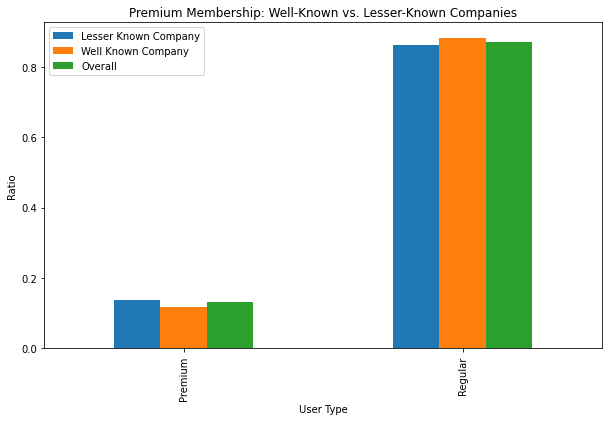

In [29]:
membership.plot(kind='bar', x='User Type', figsize=(10,6))
plt.title('Premium Membership: Well-Known vs. Lesser-Known Companies')
plt.ylabel('Ratio')

Surprisingly, the proportion of Premium LinkedIn users is lower among the population of users working in well-known companies, compared to the overall proportion of users that are Premium members. We should expect that on the left of the bar chart(the premium side), the orange bar would be higher than the green bar since a premium membership is supposed to help one connect with hiring managers and thus attain highly-coveted jobs at well-known companies. Instead, the proportion of Premium users working at lesser-known companies is larger than the overall proportion.

Although LinkedIn promotes the perks of their Premium membership, **the investment might not be worth it after all**. This suggests that there are factors, other than a Premium LinkedIn membership, that drive users to work at well-known companies. It also suggests that, perhaps, people working at lesser-known companies are more willing to invest in the premium membership since they are more likely to be trying to switch into a well-known company. Users who already work at well-known companies might not need the benefits that a premium membership provides.

### <i>The Credibility of LinkedIn Influencers: Do followers correlate with work history?<i>

<img src="img/linkedin_influencer.png" style="width: 500px;">

Whenever I log into LinkedIn, I see dozens of supposedly inspirational posts about a LinkedIn user's success story or recruitment experience. More often than not, these posts come off as narcissistic, "cringey," and attention-seeking, rather than helpful. Because of posts like these, LinkedIn influencers have been the subject of many online memes, as seen in the image above. Also, often times, these influencers do not have a strong work history to support the claims they make in their posts. 

In my analysis, I examine the credibility of LinkedIn influencers by identifying whether or not they work at Fortune 500 companies. I consider LinkedIn users with over 5,000 followers to be "LinkedIn influencers." Because of their considerably large following, I deem that they'd have an influencer on a larger number of people than users with smaller followings.

I begin by subsetting the data so that it only contains LinkedIn influencers (users with over 5,000 followers). I create a similar subset for non-influencers, and next, I calculate the proportion of influencers  working at Fortune 500 companies and compare it with the proportion of regular users working at these companies. I take the analysis a step further by examining whether influencers are older, and thus more experienced, than the average LinkedIn user.

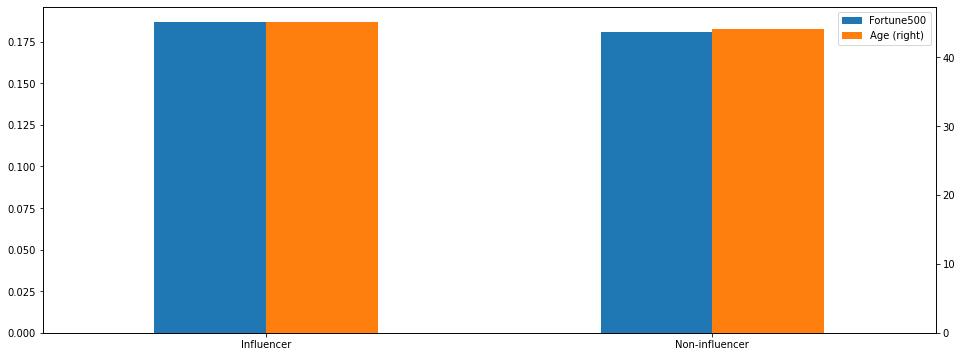

In [30]:
from io import StringIO
s = StringIO("""     Fortune500     Age
Influencer     0.18670576735092864   45.05571847507331
Non-influencer     0.18088475684511646   44.03725650456341""")
df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

_ = df.plot( kind= 'bar' , secondary_y= 'Age' , rot= 0 , figsize=(16,6))
plt.show()

**The difference between the proportions is about 0.58%.** This is a very small difference and suggests that influencer do not actually have more experience working at renowned companies than other users. Additionally, the **difference between average age is about 1 year**. Similar to the difference in Fortune 500 proportions, this is a very small difference. It further supports the idea that influencers are not very different than the average user.

Influencers, on the other hand, may simple be people who are skilled at creating compelling content. In this view, they are more like writers and storytellers than professional job advisors.

## <center>Key Takeaways<center>

Through this lengthy analysis, I've formed the following key takeaways:
1. The data finds a gender leadership gap that is smaller than expected. Yay for women!
2. The difference between tenure lengths of men and women is shorter among the age group that's prime to become new mothers and fathers. Thus, the bias against hiring women is flawed in its reasoning and must be revisited.
3. Overall, there is very strong racial diversity within the Fortune 500, based on my data. In fact, the proportion of Asians and Blacks working in Fortune 500 companies is greater than the overall population proportions. This is a very encouraging finding. 
4. This diversity praised above may be concentrated in a few companies because nearly a quarter of Fortune 500 companies in the dataset had a workforce that was 100%.
5. Before stereotyping millenials as a job-hopping generation, further analysis must be done to identify whether this job-hopping generation is simply a characteristic of young people, not a characteristic unique to millenials.
6. The transition from "assistant" and "intern" amongst younger people to "manager" and "director" amongst older people shows strong career growth among the LinkedIn users in the data.
7. Profile pictures are essential for a strong first impression, as an overwhelmingly majority of users working at Fortune 500 companies include their picture within their profile.
8. The LinkedIn premium membership is not worth it — Regular users are more likely to work at well-known companies.
9. Linkedin influencers are not much different than regular users. Take their advice with a grain of salt.

## <center>Concluding Thoughts<center>

With the complete shut-down of industries that offer face-to-face services, like hospitality, tourism and travel, and brick-and-mortor retail, the job market is more limited than is has been in the last decade. While the economic situation is bound to get better with time, especially with the recent authorization of a vaccine, the impact of the COVID-19 recession will be long-lasting. Hiring managers, during this time, received an influx of applications for a small number of openings; they are now seeking specific attributes from applicants, and they may carry on this practice even when circumstances improve. 

As job applicants enter this unusual labor market, I hope that the employment trends that I derived, with regards to age, race, and gender, allow them to understand the job market, and especially the biases that exist within the market, better. I also hope that employers find this analysis insightful, as it provides them with areas that require improvement and other areas that they're doing well in. Additionally, I hope that LinkedIn users, like me, can reap the benefits of the platform using the takeaways I concluded. From personal experience, I found the platform to be incredibly helpful during times like these, when face-to-face networking is not an option. 

Most of all, I hope my project serves as a helpful resource for job applicants as they make strides in achieving their career goals!

## <center>Thank you for reading!<center>